In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [16]:
air_df = pd.read_csv('Downloads/AirPassengers.csv')

In [17]:
air_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
air_df['Month'] = pd.to_datetime(air_df['Month'], format='%Y-%m')
print(air_df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [20]:
air_df.index = air_df['Month'].astype('datetime64[us]')
del air_df['Month']

In [21]:
air_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'No of Passengers')

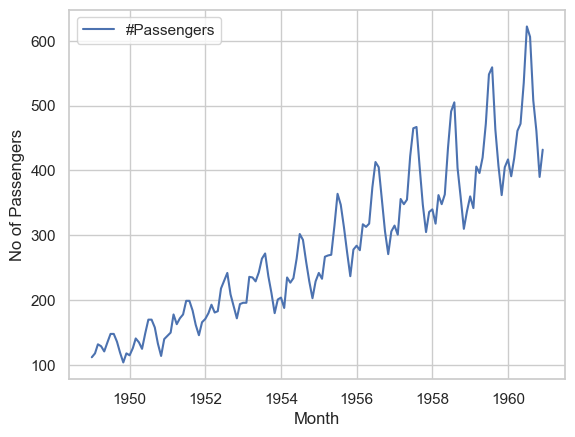

In [22]:
sns.lineplot(air_df)
plt.ylabel('No of Passengers')

In [23]:
result = seasonal_decompose(air_df['#Passengers'], model = 'multiplicative', period=12)

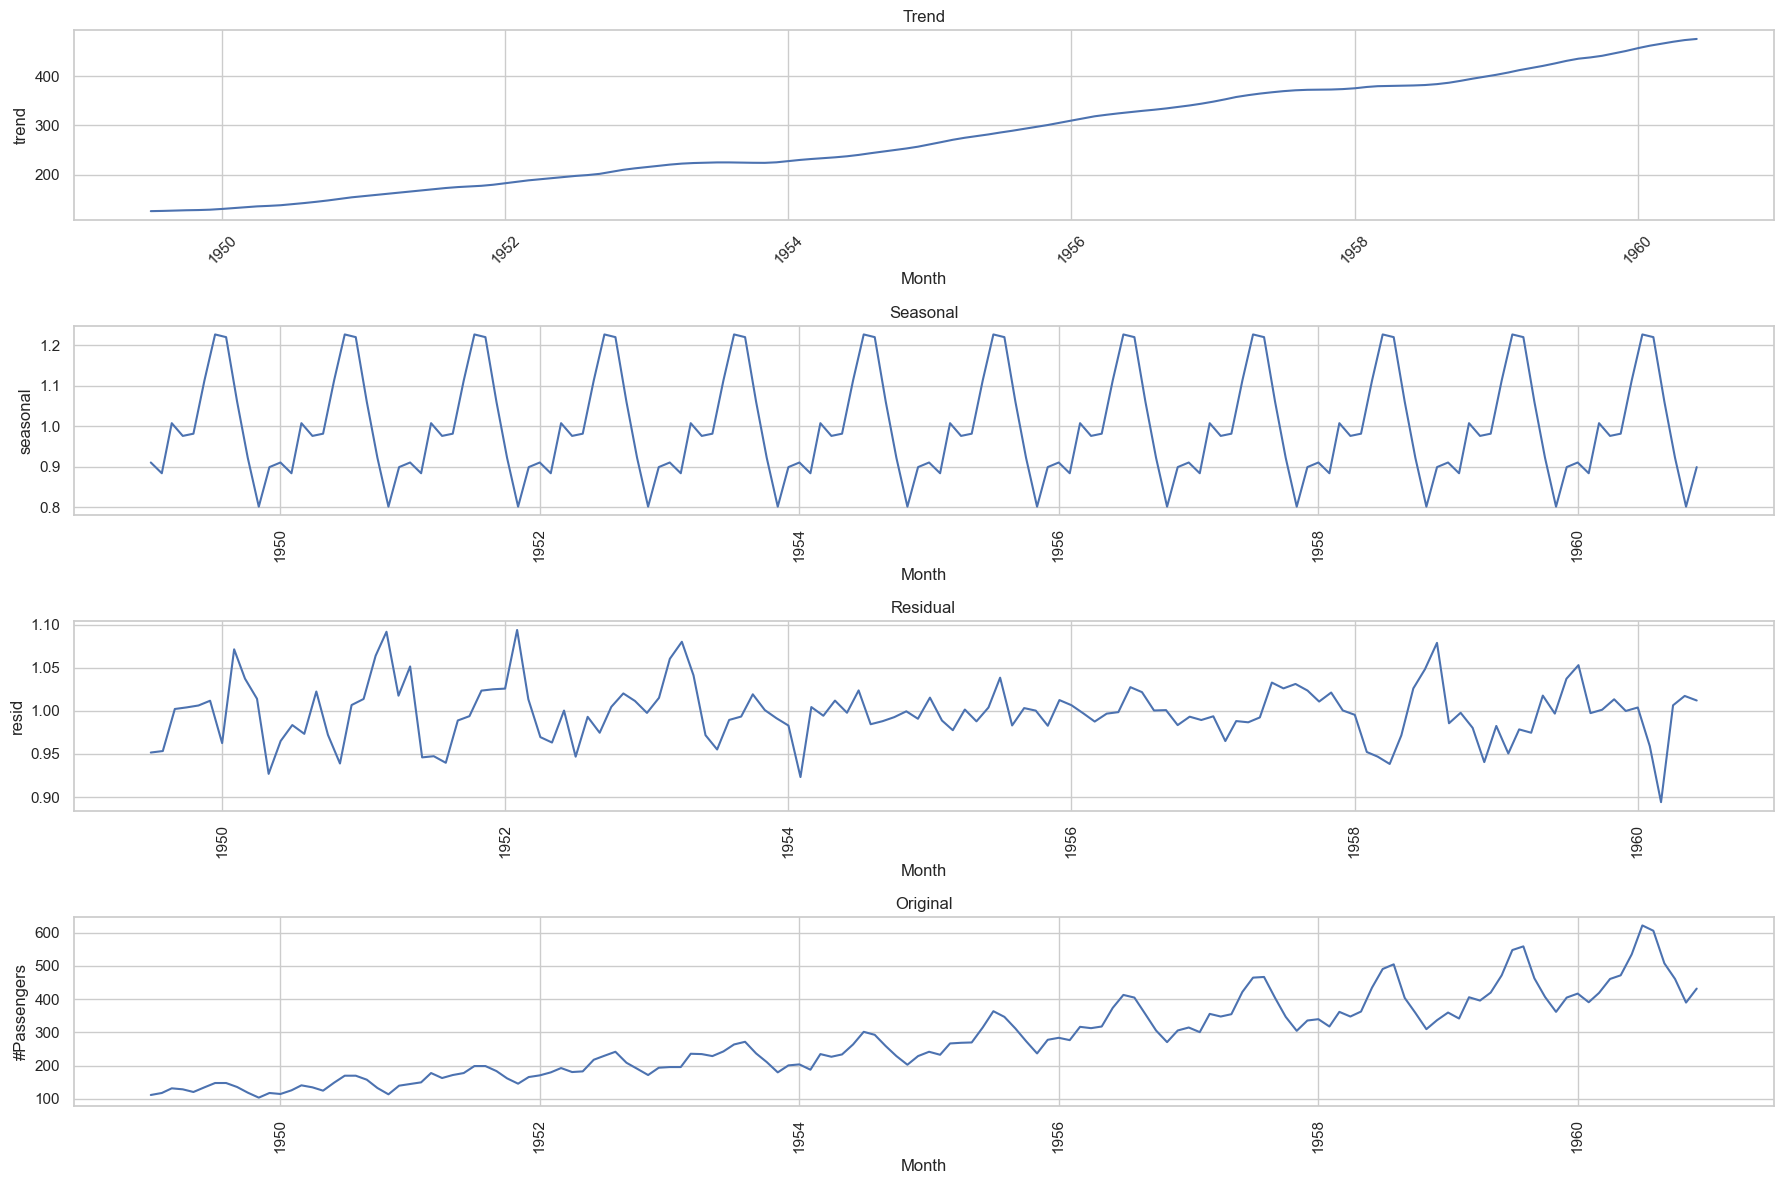

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize=(18,12))

# Trend component
plt.subplot(411)
sns.lineplot(data=result.trend)
plt.title('Trend')
plt.xticks(rotation=45)

# Seasonal component
plt.subplot(412)
sns.lineplot(data=result.seasonal)
plt.title('Seasonal')
plt.xticks(rotation=90)

# Residual component
plt.subplot(413)
sns.lineplot(data=result.resid)
plt.title('Residual')
plt.xticks(rotation=90)

# Original data
plt.subplot(414)
sns.lineplot(data=air_df['#Passengers'])
plt.title('Original')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [25]:
seasonal_period = 12

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(air_df['#Passengers'], autolag='AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics 0.8153688792060597
P value 0.9918802434376411


In [27]:
result = adfuller(air_df['#Passengers'].diff().dropna(), autolag = 'AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics -2.829266824169992
P value 0.0542132902838265


In [28]:
result = adfuller(air_df['#Passengers'].diff().diff().dropna(), autolag = 'AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics -16.384231542468527
P value 2.732891850014085e-29


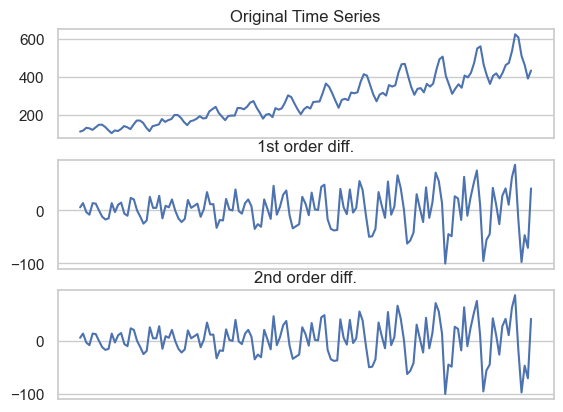

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(air_df)
ax1.set_title('Original Time Series')
ax1.axes.xaxis.set_visible(False)

ax2.plot(air_df.diff())
ax2.set_title('1st order diff.')
ax2.axes.xaxis.set_visible(False)

ax3.plot(air_df.diff())
ax3.set_title('2nd order diff.')
ax3.axes.xaxis.set_visible(False)

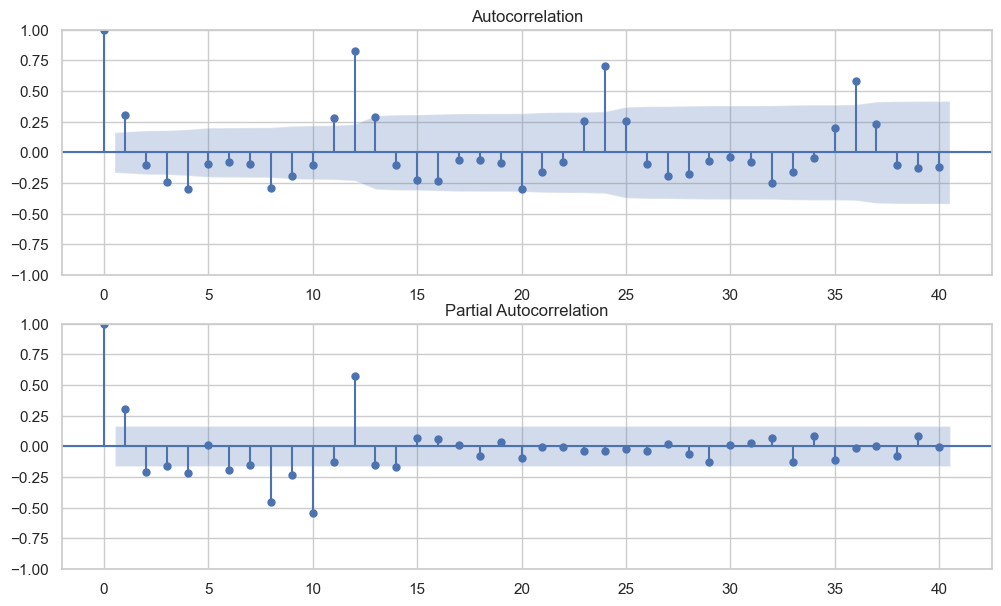

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sm.graphics.tsa.plot_acf(air_df.diff().dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(air_df.diff().dropna(), lags=40, ax=ax[1])
plt.show()

In [31]:
p =2 
d = 1
q=1

In [32]:
P = 1
D = 0
Q = 3

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air_df['#Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))
fitted_model = model.fit()
print(fitted_model.summary())

C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\ba

                                         SARIMAX Results                                          
Dep. Variable:                                #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -563.224
Date:                                    Fri, 16 Aug 2024   AIC                           1142.448
Time:                                            16:38:49   BIC                           1166.151
Sample:                                        01-01-1949   HQIC                          1152.080
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6247      0.101      6.170      0

In [34]:
forecast_steps = 24

forecast = fitted_model.get_forecast(steps = forecast_steps)

forecast_index = pd.date_range(start=air_df.index[-1], periods=forecast_steps+1, freq='M')[1:].strftime('%Y-%m-%d')


In [35]:
#Create a forecast dataframe
forecast_df = pd.DataFrame({
    "Forecast": list(forecast.predicted_mean),
    "Upper CI": list(forecast.conf_int().iloc[:, 0]),
    "Lower CI": list(forecast.conf_int().iloc[:, 1])}, index=forecast_index
)

In [36]:
forecast_df

,Forecast,Upper CI,Lower CI
1961-01-31,446.728132,424.884418,468.571845
1961-02-28,423.354516,397.217023,449.492009
1961-03-31,456.481533,426.865410,486.097657
1961-04-30,491.604168,459.572999,523.635336
1961-05-31,505.178266,471.297560,539.058971
1961-06-30,562.393584,527.073468,597.713700
1961-07-31,647.900640,611.429108,684.372171
1961-08-31,635.546702,598.135915,672.957490
1961-09-30,541.119230,502.927939,579.310521
1961-10-31,494.171187,455.320373,533.022000


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[us]', name='Month', length=144, freq=None)


C:\Users\ShravyaSrujan14\AppData\Local\Temp\ipykernel_17088\1352357322.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month.get_text().title() for month in ax.get_xticklabels()])


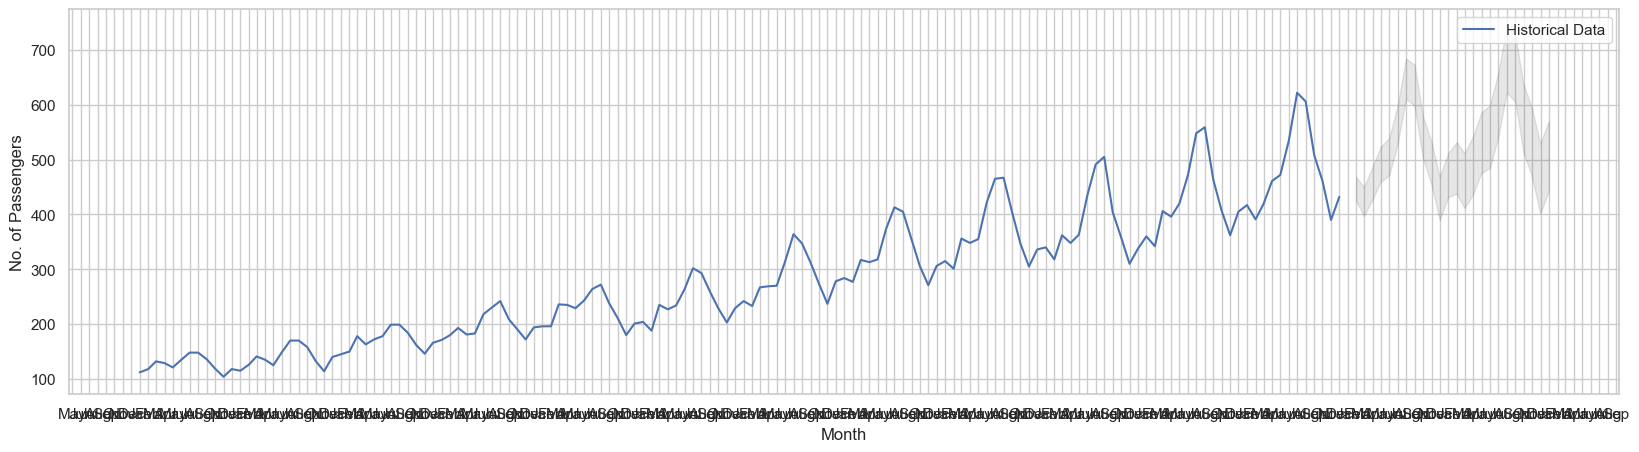

In [39]:
import matplotlib.dates as md 

plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,5))

ax.plot(air_df['#Passengers'], label = 'Historical Data')


plt.fill_between(pd.to_datetime(forecast_df.index), forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.1)

ax.legend()
ax.set_ylabel('No. of Passengers')
ax.set_xlabel('Month')

ax.xaxis.set_major_locator(md.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

air_df.index = pd.to_datetime(air_df.index)
print(air_df.index)

# ax.set_xlim([forecast_df.index])

fig.canvas.draw()
ax.set_xticklabels([month.get_text().title() for month in ax.get_xticklabels()])

plt.show()